# Proyecto: Análisis mercado inmobiliario de la Ciudad de Buenos Aires

¡Bienvenidos al primer proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a trabajar con un dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo es dar los primeros pasos en el proceso de exploración de datos usando las herramientas que trabajamos en las activades.

Vamos a enfocarnos en analizar algunos aspectos del mercado inmobiliario de la Ciudad de Buenos Aires pero para eso primero debemos limpiar un poco el dataset.

## El dataset: propiedades en venta en Ciudad de Buenos Aires.

En este proyecto, trabajaremos con una muestra del conjunto de datos de propiedades en venta mencionado. En este dataset, cada fila es una propiedad en venta. 

## Los atributos
A continuación vamos a describir los atributos que consideramos en esta muestra:

* **id**: id de la propiedad
* **created_on**: fecha en la que la propiedad ingresó al sitio
* **operation**: alquiler (rent) o venta (sell)
* **property_type**: tipo de propiedad (casa, departamento, ph, etcétera)
* **place_with_parent_names**: nombre del lugar donde se encuentra la propiedad según el publicador
* **lat-lon**: coordenadas concatenadas
* **lat**: latitud
* **lon**: longitud
* **price**: precio en la moneda especificada en currency
* **currency**: divisa en la que está expresada la publicación
* **price_aprox_usd**: precio aproximado en dólares estadounidenses
* **surface_total_in_m2**: superficie total (en metros cuadrados)
* **surface_covered_in_m2**: superficie cubierta (en metros cuadrados)
* **price_usd_per_m2**: precio por metro cuadrado en dólares (precio dólares / superficie)
* **floor**: número de piso (si corresponde)
* **rooms**: cantidad de ambientes
* **expenses**: expensas (si corresponde)
* **barrio**: barrio según cartografía oficial
* **properati_url**: url de la publicación en Properati


## Importando las bibliotecas necesarias

Para poder trabajar en la limpieza de datos y la visualización de nuestro dataset vamos a utilizar las bibliotecas numpy, pandas, matplotlib.pylab y seaborn. 

** 1) Importá ** cada una de ellas con los siguientes nombres: 
- **numpy** como **np**
- **pandas** como **pd**
- **matplotlib.pylab** como **plt**
- **seaborn** como **sns**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

## Cargando dataset de propiedades

**2) Cargá** el dataset que se encuentra en la carpeta *dataset/* y guardalo en una variable llamada **df**. 
No te olvides de utilizar **parse_dates** sobre la columna **created_on**


In [2]:
#df = pd.read_csv (r'C:\Acamica\entrega1\dataset\datos_properati.csv')
df = pd.read_csv(r'C:\Acamica\entrega1\dataset\datos_properati.csv',parse_dates=['created_on'])

## Exploración de datos

Lo primero que vamos a hacer es ver qué forma tiene el dataset que acabamos de cargar. Para eso vamos a mostrar las primeras 3 entradas del mismo y utilizar la propiedad `shape` para ver la cantidad de instancias y atributos con los que vamos a estar trabajando.

In [3]:
df.head(3)

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,312.0,NaN,6410.25641,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_pa...,PALERMO,14.0
1,2017-08-01,sell,store,|Argentina|Capital Federal|Palermo|,"-34.586069,-58.414431",-34.586069,-58.414431,790000.0,121.0,121.0,6528.92562,NaN,NaN,NaN,https://www.properati.com.ar/1cl7l_venta_local...,PALERMO,14.0
2,2017-08-02,sell,store,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.589723,-58.4325664",-34.589723,-58.432566,343000.0,122.0,108.0,2811.47541,NaN,2.0,NaN,https://www.properati.com.ar/1cm8w_venta_local...,PALERMO,14.0


In [4]:
print(df.shape)

(18979, 17)


## Categorías de propiedades
En primer lugar vamos a ver qué categorías existen en el campo `property_type`. Y de esas categorías cuantos valores tenemos de cada uno.

**3) Mostrá** las categorías de `property_type` y cuántas instancias hay de cada una.

Recordá utilizar funciones del **dataframe** de pandas para realizar esto.

In [5]:
array = df.property_type.unique()
print(array)

['house' 'store' 'apartment' 'PH']


In [6]:
df.property_type.value_counts()

apartment    14807
house         1618
PH            1463
store         1091
Name: property_type, dtype: int64

### Filtrando las categorías

De las categorías existentes sólo queremos quedarnos con las que sean casas (house), departamentos (apartment) o PH (PH). 

Para esto, 

**4) filtrá** el `dataframe` original creando un **nuevo** `dataframe` llamado `df_filtered`. Este es el `dataframe` que seguirás usando a lo largo del análisis.


In [7]:
propiedades = ["PH", "house", "apartment"]
df_filtered = df[df.property_type.isin(propiedades)]
print(df_filtered.shape)

(17888, 17)


### Visualizando las categorías
**5)** Utilizando `seaborn` **creá un countplot** para visualizar las categorías de `df_filtered` en el campo `property_type` 

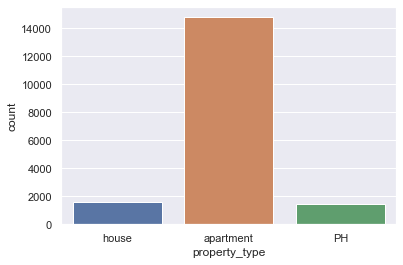

In [8]:
sns.set(style="darkgrid")
ax = sns.countplot(x="property_type", data=df_filtered)

## Valores Faltantes

Vamos a querer descartar aquellas instancias que tengan valores nulos en columnas importantes para el análisis del mercado.
Estas columnas son las que informan **superficie (total o cubierta)**, **cantidad de ambientes**, **precio** y **precio por metro cuadrado**.

**6) Quitá** del `dataframe` las instancias que no tengan ningún valor en los campos nombrados.

Se Procede a quitar las **instancias**(filas) para las **columnas** en mencion para evitar inconsitencias, se copió el dataframe con fines de comprobacion y para validarlo en el proximo punto, de igual manera se incluyó la columna rooms debido a que tambien tiene datos inconsistentes 

In [9]:
main_columns = ['surface_total_in_m2','surface_covered_in_m2','price_aprox_usd', 'price_usd_per_m2', 'rooms']
texto = ''
for item in main_columns:
        valor = sum(pd.isnull(df_filtered[item]))
        texto = texto +  item + ': ' + str(valor)+ '\n'

En la celda anterior se calcularon las instancias que seran removidas bajo la premisa de que han tenido valores nulos

In [10]:
df_filtered.dropna(subset=main_columns, inplace=True) 
print(df_filtered.shape)

(11975, 17)


C:\Users\Ricardo\.conda\envs\dsbasic\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**7)** A continuación **mostrá** cuantas instancias son las que descartaste a partir de quitar las que tenían valores nulos.

Se muestran los valores previmente calculados, referente a las instancias removidas

In [11]:
print(texto)

surface_total_in_m2: 2197
surface_covered_in_m2: 1920
price_aprox_usd: 1377
price_usd_per_m2: 2681
rooms: 4481



Posiblemente existan otros atributos con valores faltantes en el dataset, pero que no son de tanta importancia. 

**8) Mostrá** qué otros atributos tienen valores faltantes en el `dataframe`.

In [12]:
todas_columnas = df_filtered.columns
texto = ''
for item in todas_columnas:
    if not item in main_columns:
        valor = sum(pd.isnull(df_filtered[item]))
        if valor> 0:
            texto = texto + item + ': ' + str(valor) + '\n'
print(texto)

floor: 10112
expenses: 9703



Despues de validar el contenido del dataframe y las posibles operaciones a efectuar, se encontró que las columnas 'floor' y 'expenses' no tenian datos en la mayoria de sus instancias

#### Desafío: planteá alguna estrategia posible para reemplazar los valores faltantes en el atributo `surface_total_in_m2`.

Pueden Existir numerosas estrategias para solucionar el tema de los faltantes en el campo en mencion, seria conveniente segmentar un poco mas al agrupar de acuerdo al numero de cuartos y con base a ello establecer un total de metros cuadrados, generar un promedio por cada tipo de propiedad con referencia al precio y al sector y hacer un calculo de su superficie con base al precio del inmueble

## Datos erróneos

El siguiente paso es analizar errores que puede llegar a haber en el dataset. 

Por ejemplo, la **superficie total no puede ser menor que la cubierta**. Si esto sucede, podemos optar por eliminar esas filas o intentar corregir el problema. Veamos en primer lugar si esto sucede.

**9) Mostrá** cuantas instancias existen que tengan el problema de este dato erróneo y guardalas en una variable llamada `wrong_surface_rows`

In [13]:
wrong_surface_rows = df_filtered[df_filtered.surface_total_in_m2 < df_filtered.surface_covered_in_m2]
wrong_surface_rows.count()
print(wrong_surface_rows.shape)
wrong_surface_rows.head()

(73, 17)


,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
106,2017-09-07,sell,house,|Argentina|Capital Federal|Belgrano|,"-34.566867,-58.444197",-34.566867,-58.444197,1650000.00,455.0,456.0,3626.373626,NaN,5.0,NaN,https://www.properati.com.ar/1ehbq_venta_casa_...,PALERMO,14.0
153,2017-09-12,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5830704,-58.4241896",-34.583070,-58.424190,140000.00,39.0,44.0,3589.743590,NaN,1.0,NaN,https://www.properati.com.ar/1en9l_venta_depar...,PALERMO,14.0
935,2017-11-06,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5869532,-58.4189032",-34.586953,-58.418903,275000.00,13.0,79.0,21153.846154,1.0,4.0,NaN,https://www.properati.com.ar/1htrv_venta_depar...,PALERMO,14.0
1174,2017-11-22,sell,house,|Argentina|Capital Federal|Palermo|,"-34.583652,-58.444111",-34.583652,-58.444111,930000.00,205.0,343.0,4536.585366,NaN,5.0,NaN,https://www.properati.com.ar/1ibt5_venta_casa_...,PALERMO,14.0
1176,2017-11-22,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5821555519,-58.4230147059",-34.582156,-58.423015,297109.32,117.0,745.0,2539.395897,7.0,2.0,NaN,https://www.properati.com.ar/1ibu1_venta_depar...,PALERMO,14.0


Proponemos no borrar estas instancias erróneas, sino intercambiar los valores de **superficie total** con **superficie cubierta** en caso de que se cumpla la condición mencionada.

In [14]:
df_filtered.at[wrong_surface_rows.index, 'surface_total_in_m2'] = wrong_surface_rows.surface_covered_in_m2
df_filtered.at[wrong_surface_rows.index, 'surface_covered_in_m2'] = wrong_surface_rows.surface_total_in_m2

C:\Users\Ricardo\.conda\envs\dsbasic\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Por otro lado, sucede que las inmobiliarias cuando no cuentan con las coordenadas reales de las propiedades utilizan valores que no son correctos. Por ejemplo, el punto centro de cada barrio o puntos de interés como el Obelisco. Esto puede afectar el análisis relacionado con la ubicación de cada propiedad.

Veamos en primer lugar si hay coordenadas que se repiten.

In [15]:
conteo_puntos = df_filtered.groupby(['lat', 'lon']).size()
conteo_puntos[conteo_puntos > 1].sort_values(ascending=False).head(10)

lat         lon       
-34.589546  -58.397364    149
-34.571150  -58.423297    118
-34.562084  -58.456686     77
-34.620928  -58.445874     45
-34.609821  -58.392606     36
-34.597679  -58.443019     31
-34.617719  -58.362056     31
-34.621184  -58.373116     31
-34.610122  -58.405941     31
-34.598647  -58.439018     29
dtype: int64

Por ejemplo, para el caso del tercer punto, se puede verificar que corresponde a la esquina de Av. Cabildo y Juramento.
Nos quedamos entonces con las propiedades con coordenadas que se repitan hasta 5 veces.

In [16]:
conteo_puntos.name = 'conteo'

df_filtered = df_filtered.join(conteo_puntos, on=['lat', 'lon'])

df_filtered = df_filtered[df_filtered.conteo <= 5]

Eliminamos el atributo `conteo` dado que ya no nos sirve.

In [17]:
df_filtered.drop('conteo', inplace=True, axis=1)

## Estudiando los barrios

### Barrios con más edificios y barrios con más casas
Al saber qué barrios son los que tienen más cantidad de edificios en venta y cuáles son los que tienen más casas podemos darnos una idea de qué tipo de barrio es. Si es más residencial, con más población, poder adquisitivo, etc. 
Para eso vamos a empezar calculando los porcentajes de cada tipo de propiedad según el barrio.

In [18]:
total_propiedades = df_filtered.groupby('barrio')['property_type'].count().values

In [19]:
porcentaje_casas_ph = df_filtered[df_filtered.property_type.isin(['PH', 'house'])].groupby('barrio').count().property_type/total_propiedades
porcentaje_edificios = df_filtered[df_filtered.property_type == 'apartment'].groupby('barrio').count().property_type/total_propiedades

In [20]:
print("Barrios con mayor porcentaje de edificios: \n", porcentaje_edificios.sort_values()[::-1][:5])
print("Barrios con mayor porcentaje de casas y phs: \n ", porcentaje_casas_ph.sort_values()[::-1][:5])

Barrios con mayor porcentaje de edificios: 
 barrio
PUERTO MADERO    0.995238
RETIRO           0.992647
SAN NICOLAS      0.989011
RECOLETA         0.987342
BELGRANO         0.952446
Name: property_type, dtype: float64
Barrios con mayor porcentaje de casas y phs: 
  barrio
VERSALLES            0.622222
MATADEROS            0.612500
PARQUE AVELLANEDA    0.560606
VILLA RIACHUELO      0.555556
VILLA REAL           0.500000
Name: property_type, dtype: float64


Para darnos una idea de las diferencias entre los porcentajes de edificios y casas en estos barrios, vamos a graficarlos
en forma de torta.

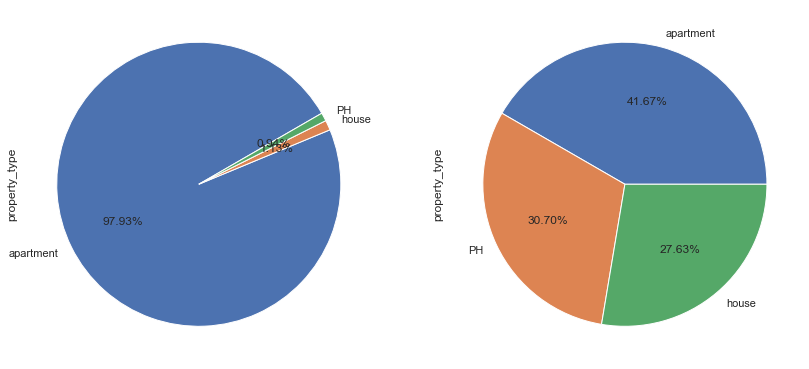

In [21]:
barrios_casas = porcentaje_casas_ph.sort_values()[::-1][:5].index
barrios_edificios = porcentaje_edificios.sort_values()[::-1][:5].index
fig, axs = plt.subplots(1,2,figsize=(14,7))
df_filtered[df_filtered.barrio.isin(barrios_edificios)].property_type.value_counts().plot(x=None,y=None, kind='pie', startangle=30, ax=axs[0],autopct='%1.2f%%')
df_filtered[df_filtered.barrio.isin(barrios_casas)].property_type.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')

### Barrios más caros y más baratos

Veamos primero la distribución del precio por metro cuadrado para todo el dataset. De esta manera, vamos a remover valores que consideremos extremos.

En el siguiente proyecto vamos a volver sobre este tema con más profundidad.

**10)** Tomando el atributo `price_usd_per_m2` **calculá** su **mínimo**, **máximo**, **promedio (mean)**, **mediana (median)** y **desvío estándar (std)**

In [22]:
df_filtered.describe()

,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,comuna
count,10523.000000,10523.000000,1.052300e+04,10523.000000,10523.000000,10523.000000,1639.000000,10523.000000,2224.000000,10523.000000
mean,-34.597984,-58.433530,3.019960e+05,150.821154,127.169628,2785.655144,11.386211,3.095220,4916.036871,8.197377
std,0.025877,0.039353,3.760752e+05,2169.443246,1892.228669,1997.772174,58.884049,1.676469,5156.148984,5.114030
min,-34.694841,-58.529243,5.043300e+03,16.000000,2.000000,0.958333,1.000000,1.000000,1.000000,1.000000
25%,-34.616552,-58.461703,1.250000e+05,50.000000,44.000000,2039.289915,2.000000,2.000000,2000.000000,3.000000
50%,-34.597342,-58.433261,1.900000e+05,77.000000,69.000000,2588.235294,4.000000,3.000000,3200.000000,9.000000
75%,-34.579631,-58.401605,3.350000e+05,135.000000,114.000000,3203.982564,7.000000,4.000000,5800.000000,13.000000
max,-34.536440,-58.354381,1.111111e+07,184000.000000,150000.000000,142450.141026,904.000000,30.000000,40000.000000,15.000000


También podemos calcular otros estadísticos como los cuartiles. 

**11) Mostrá** el **primer y tercer cuartil** y luego también el **rango intercuartilíco**

El Rango es la diferencia entre el Maximo y el Minimo

primer cuartil

In [23]:
primer_cuartil = df_filtered["price_usd_per_m2"].quantile(0.25)
print(primer_cuartil)

2039.2899147309618


tercer cuartil

In [24]:
tercer_cuartil = df_filtered["price_usd_per_m2"].quantile(0.75)
print(tercer_cuartil)

3203.982563899346


rango intercuartilico

In [25]:
iqr = df_filtered["price_usd_per_m2"].quantile(0.75) - df_filtered["price_usd_per_m2"].quantile(0.25)
print(iqr)

1164.6926491683844


rango

In [26]:
maximo = max(df_filtered["price_usd_per_m2"])
minimo = min(df_filtered["price_usd_per_m2"])
rango = maximo - minimo
print (rango)

142449.18269230772


### Quitando valores extremos
Eliminemos aquellas observaciones cuyo precio por metro cuadrado este fuera de los percentiles 10 y 90. De este modo intentaremos remover valores extremos de una manera sencilla para tener un análisis más robusto.

In [27]:
p10 = np.percentile(df_filtered.price_usd_per_m2, 10)
p90 = np.percentile(df_filtered.price_usd_per_m2, 90)
df_filtered = df_filtered[(df_filtered.price_usd_per_m2 >= p10) & (df_filtered.price_usd_per_m2 <= p90)]

A partir de quitar estos valores van a cambiar los estadísticos que calculamos.

**12) Volvé a calcular** los mismos estadísticos (min, max, promedio, etc) para ver los cambios.
¿Por qué será que la **mediana** no cambia? no deberia cambiar por que la proporcion de las observaciones eliminadas de los extremos son iguales y la mediana se encarga de contar las observaciones y buscar la posicion central de la muestra.

In [28]:
minimo = min(df_filtered["price_usd_per_m2"])
maximo = max(df_filtered["price_usd_per_m2"])
media = df_filtered["price_usd_per_m2"].mean()
mediana = df_filtered["price_usd_per_m2"].median()
desviacion = df_filtered["price_usd_per_m2"].std()
moda = df_filtered["price_usd_per_m2"].mode()
print("""
    Minimo: %d
    Maximo: %d
    Media: %d
    Mediana: %d
    desviacion: %d
""" % (minimo, maximo, media,mediana,desviacion))


    Minimo: 1552
    Maximo: 4095
    Media: 2632
    Mediana: 2588
    desviacion: 607



Vamos a graficar ahora los barrios según el precio por metro cuadrado.

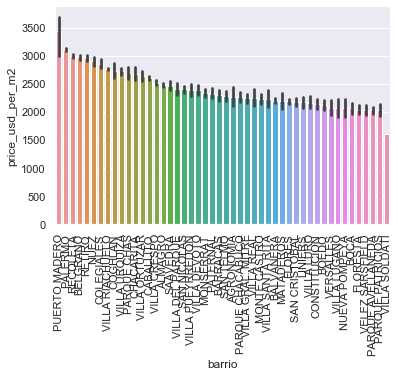

In [29]:
plt.xticks(rotation = 90)
barrios = df_filtered.groupby('barrio').mean().sort_values('price_usd_per_m2', ascending=False).index
sns.barplot(x="barrio", y="price_usd_per_m2", order=barrios, data=df_filtered);

#### Más caros

In [30]:
table = pd.pivot_table(df, values='price_usd_per_m2', index=['barrio'], aggfunc=np.mean)
mas_caros = table.sort_values('price_usd_per_m2', ascending=False).iloc[:5]
mas_caros

,price_usd_per_m2
barrio,
PUERTO MADERO,6156.633183
PALERMO,3632.057960
RETIRO,3417.635657
RECOLETA,3346.748987
BELGRANO,3338.725206


#### Más baratos

In [31]:
table = pd.pivot_table(df, values='price_usd_per_m2', index=['barrio'], aggfunc=np.mean)
mas_baratos = table.sort_values('price_usd_per_m2', ascending=True).iloc[:5]
mas_baratos

,price_usd_per_m2
barrio,
VILLA SOLDATI,920.825753
VILLA LUGANO,1179.846071
VILLA RIACHUELO,1274.809950
PARQUE AVELLANEDA,1386.260577
NUEVA POMPEYA,1539.235869


## Graficando propiedades de los barrios

Ahora que ya sabemos cuales son los barrios más caros y cuales son los más baratos vamos a ver algunas comparaciones gráficas para entender mejor sus diferencias en diferentes atributos del dataset. Vamos a ver las distribuciones según:
- Superficie total en m2
- Cuartos totales 
- Precio en dolares por m2

In [32]:
barrios_caros = mas_caros.index 
barrios_baratos = mas_baratos.index

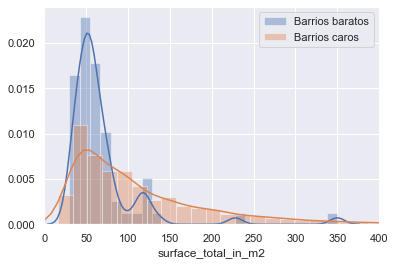

In [33]:
g = sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_baratos)].surface_total_in_m2, label="Barrios baratos")
sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_caros)].surface_total_in_m2, label="Barrios caros")
g.set_xlim(0, 400)
plt.legend()

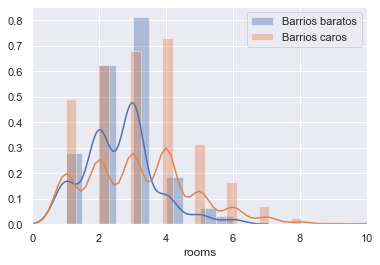

In [34]:
g = sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_baratos)].rooms, label="Barrios baratos")
sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_caros)].rooms, label="Barrios caros")
g.set_xlim(0, 10)
plt.legend()

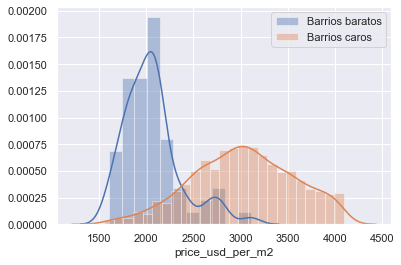

In [35]:
g = sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_baratos)].price_usd_per_m2, label="Barrios baratos")
sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_caros)].price_usd_per_m2, label="Barrios caros")
plt.legend()

### Barrios que quieren ser otros

Basado en información de mercado, desde el portal Properati han señalado que las inmobiliarias suelen publicar las propiedades ubicadas en barrios que no necesariamente se corresponden con la ubicación geográfica real. Según mencionan en la nota ([blog)](http://blog.properati.com.ar/barrios-que-quieren-ser-otros/), esto corresponde a una lógica comercial en el corredor norte y a usos y costumbres en zona oeste.

Analicemos qué sucede para nuestro dataset.

Dada la estructura del atributo `place_with_parent_names`, en primer lugar vamos a extraer el campo asociado al barrio publicado para poder comparar con el que surge de la cartografía oficial. Esto lo vamos a agregar en una nueva columna llamada `barrio_publicado`. 

De este modo, lo que vamos a analizar es como se relacionan las columnas `barrio` y `barrio publicado`. Si efectivamente hay barrios que quieren ser otros, esperaríamos ver propiedades ubicadas en geográficamente en un barrio distinto al que dice la publicación. Por ejemplo, si una propiedad está ubicada (dadas sus coordenadas) en Villa Crespo pero en la publicación dice Palermo, entonces decimos que hay indicios que Villa Crespo quiere ser Palermo.

Viendo la estructura de este atributo, podemos notar que se compone por una sequencia de lugares separados por `|`. Por ejemplo, en `|Argentina|Capital Federal|Palermo|` vemos que primero está el país, luego la ciudad, luego el barrio y en algunos casos hay una jerarquía más, relacionado con zonas dentro del barrio (como Palermo Soho dentro de Palermo). 

De este modo, una estrategia posible para resolver esto es separar las jerarquías por `|` y extraer el elemento asociado al barrio. Por ejemplo, para `|Argentina|Capital Federal|Palermo|` queda `['', 'Argentina', 'Capital Federal', 'Palermo', '']`. Extrayendo el tercer elemento obtendremos el barrio independientemente de si hay lugares luego en la jerarquía. Aquellos que no tengan barrio no serán considerados puesto que estarían ubicados en Capital Federal y no sería informativo.

Lo pasamos a mayúsculas y quitamos las tildes para poder comparar con el barrio oficial.

In [36]:
df_filtered['place_with_parent_names'].apply(lambda x: len(x.split("|"))).unique()

array([5, 6, 4], dtype=int64)

Como algunos tienen 4 elementos, debemos quitarlos.

In [37]:
split_place_filter = df_filtered['place_with_parent_names'].apply(lambda x: len(x.split("|"))!=4)
df_filtered = df_filtered.loc[split_place_filter]

In [38]:
df_filtered['barrio_publicado'] = df_filtered['place_with_parent_names'].apply( lambda x: x.split("|")[3].upper())
df_filtered['barrio_publicado'] = df_filtered['barrio_publicado'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

Comparemos entonces el barrio publicado con el real. Nos vamos a quedar con aquellas propiedades donde nos coincidan para luego hacer el conteo por barrio.

In [39]:
barrios_match = (df_filtered['barrio_publicado'] != df_filtered['barrio'])
df_filtered_barrio_not_match = df_filtered.loc[barrios_match]

Con una tabla de doble entrada podemos identificar para cada barrio cuál es al que más quiere parecerse.

In [40]:
table = pd.crosstab(df_filtered_barrio_not_match.barrio, df_filtered_barrio_not_match.barrio_publicado)
table.idxmax(axis=1)

barrio
AGRONOMIA                VILLA PUEYRREDON
ALMAGRO                         CABALLITO
BALVANERA                            ONCE
BARRACAS                        SAN TELMO
BELGRANO                            NUNEZ
BOCA                             BARRACAS
BOEDO                             ALMAGRO
CABALLITO               PARQUE CENTENARIO
CHACARITA                      COLEGIALES
COGHLAN                          BELGRANO
COLEGIALES                       BELGRANO
CONSTITUCION                    SAN TELMO
FLORES                          CABALLITO
FLORESTA                           FLORES
LINIERS                         VERSALLES
MATADEROS                      VILLA LURO
MONSERRAT                       SAN TELMO
MONTE CASTRO                 VILLA DEVOTO
NUEVA POMPEYA            PARQUE PATRICIOS
NUEZ                                NUNEZ
PALERMO                          BELGRANO
PARQUE AVELLANEDA                FLORESTA
PARQUE CHACABUCO                CABALLITO
PARQUE CHAS                

Podemos ver entonces que los barrios tienden a querer parecerse a barrios con precio con metro cuadrado más caro. Por ejemplo Villa Crespo con Palermo, Constitución con San Telmo y Villa Urquiza con Belgrano. 

Por otro lado, vemos también que los barrios suelen querer parecerse a sus barrios vecinos.